# EDA pour les données de diet

In [26]:
%pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.7/287.7 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pickle
%matplotlib inline


## Lecture du dataset

In [3]:
diet_df=pd.read_csv('diet_exercise_calorise_recommandation_Dataset.csv',delimiter=';')
diet_df.head()

,Age,Gender,Height,Weight,BMI,Fitness Level,Fitness Goal,Medical History,Diet Recommended,BMR,Calories,Exercise
0,59,F,4.9,42,18.928228,Underweight,weight gain,none,High calorie,1051.38,1997.622,Lunge
1,58,F,4.9,42,18.928228,Underweight,weight gain,none,High calorie,1056.08,2006.552,Lunge
2,59,F,5.0,42,18.178670,Underweight,weight gain,none,High calorie,1057.02,2008.338,Lunge
3,57,F,4.9,42,18.928228,Underweight,weight gain,none,High calorie,1060.78,2015.482,Lunge
4,59,F,4.9,43,19.378900,Normal weight,muscle building,none,High Protein Diet,1060.84,1644.302,Resistance training


In [4]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84696 entries, 0 to 84695
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               84696 non-null  int64  
 1   Gender            84696 non-null  object 
 2   Height            84696 non-null  float64
 3   Weight            84696 non-null  int64  
 4   BMI               84696 non-null  float64
 5   Fitness Level     84696 non-null  object 
 6   Fitness Goal      84696 non-null  object 
 7   Medical History   84696 non-null  object 
 8   Diet Recommended  84696 non-null  object 
 9   BMR               84696 non-null  float64
 10  Calories          84696 non-null  float64
 11  Exercise          84696 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 7.8+ MB


In [5]:
diet_df.shape

(84696, 12)

### Recommandation suivant le profil
Lors de la première connexion sur la plateforme, l’utilisateur devra remplir certaines informations le concernant comme son type de régime alimentaire, son objectif nutritionnel (perte de poids, santé cardiaque, etc.), sa recommandation diététique, et antécédent médical. Ces informations seront des critères sur lesquelles l’algorithme se basera pour recommander des plats tout en tenant comme du pouvoir d’achat de l’utilisateur.

In [6]:
diet_df= diet_df[['Age','Gender','Fitness Goal','Medical History','Diet Recommended']]

In [7]:
diet_df['id']=[i for i in range(diet_df.shape[0])]

In [8]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84696 entries, 0 to 84695
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               84696 non-null  int64 
 1   Gender            84696 non-null  object
 2   Fitness Goal      84696 non-null  object
 3   Medical History   84696 non-null  object
 4   Diet Recommended  84696 non-null  object
 5   id                84696 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ MB


## Analyse univariée

<Axes: ylabel='Frequency'>

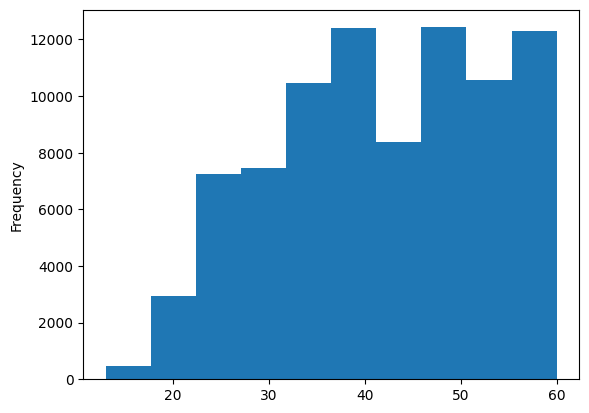

In [9]:
diet_df.Age.plot(kind='hist')

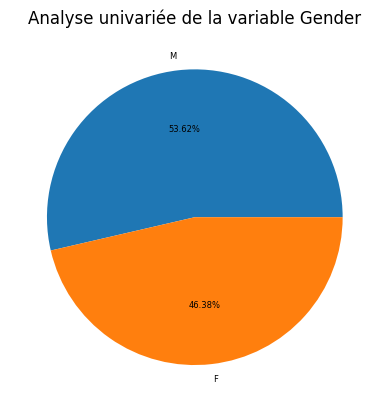

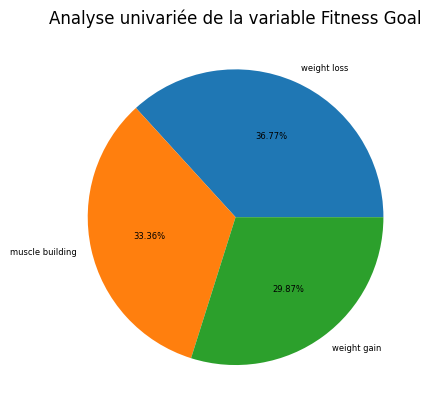

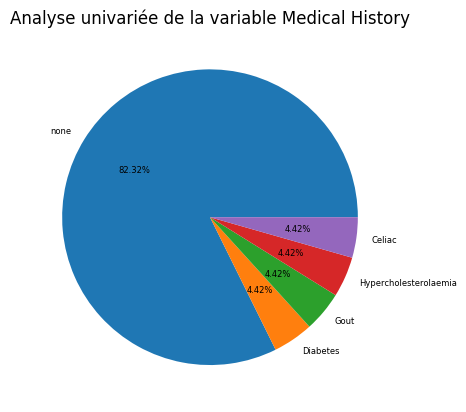

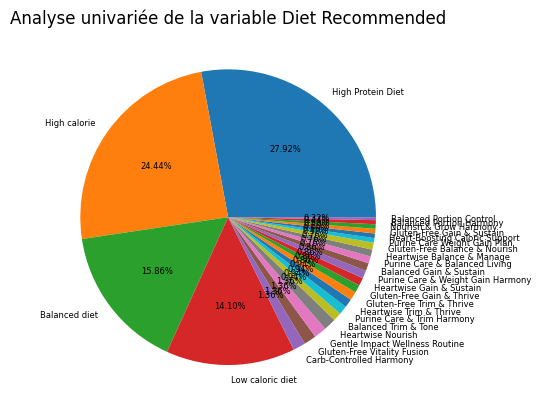

In [10]:
for col in diet_df.select_dtypes('object'):
    plt.title(f'Analyse univariée de la variable {col}')
    diet_df[col].value_counts().plot(kind='pie', autopct='%1.2f%%',ylabel='',fontsize=6)
    plt.Figure(figsize=(20,60))
    plt.show()

In [82]:
diet_df=diet_df.sample(3000).reset_index(drop=True).drop('index',axis=1)

In [83]:
diet_df.head()

,Age,Gender,Fitness Goal,Medical History,Diet Recommended,id
0,60,F,weight gain,Celiac,Gluten-Free Gain & Thrive,39233
1,40,M,weight loss,none,Low caloric diet,78287
2,37,F,weight loss,none,Balanced diet,18612
3,60,F,muscle building,none,High Protein Diet,1069
4,37,F,weight loss,none,Balanced diet,26694


In [64]:
combined_features= diet_df['Gender']+" "+diet_df['Fitness Goal']+" "+diet_df['Medical History']+" "+diet_df['Diet Recommended']

In [65]:
vectorizer=TfidfVectorizer(analyzer='word')
combined_features=vectorizer.fit_transform(combined_features)

In [66]:
similarity=cosine_similarity(combined_features)

In [15]:
for i,p in sorted(list(enumerate(similarity[2])), reverse=True,key=lambda v: v[1])[0:5]:
    print(diet_df.iloc[i,5])

81381
31911
33955
79805
38867


In [90]:
#pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(diet_df,open('user_dataset.pkl','wb'))

In [17]:
gender="M"
aim='Test'
medical='mAp'

In [18]:
plats=pd.read_csv('All_Diets.csv')

In [93]:
from random import randrange,shuffle
randint=randrange(1,diet_df.shape[0])

In [94]:
df=plats[['Cuisine_type','Recipe_name','Diet_type']]
df['id']=0
df['id']=df['id'].apply(lambda x:randrange(1,diet_df.shape[0]))

/var/folders/wg/bvw8tv0s2hqdp6rjqb_0l11m0000gn/T/ipykernel_3290/1788850133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id']=0
/var/folders/wg/bvw8tv0s2hqdp6rjqb_0l11m0000gn/T/ipykernel_3290/1788850133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id']=df['id'].apply(lambda x:randrange(1,diet_df.shape[0]))


In [95]:
pickle.dump(df,open('plats.pkl','wb'))

In [91]:
df=pickle.load(open('user_dataset.pkl','rb'))

In [92]:
df.head()

,Age,Gender,Fitness Goal,Medical History,Diet Recommended,id
0,60,F,weight gain,Celiac,Gluten-Free Gain & Thrive,39233
1,40,M,weight loss,none,Low caloric diet,78287
2,37,F,weight loss,none,Balanced diet,18612
3,60,F,muscle building,none,High Protein Diet,1069
4,37,F,weight loss,none,Balanced diet,26694


In [59]:
df.reset_index(inplace=True)

In [60]:
index=df.index[(df['Gender']=="M")&(df['Fitness Goal']=="weight gain")&(df['Medical History']=="none")]

In [61]:
index[0]

1

In [62]:
sorted(list(enumerate(similarity[index[0]])), reverse=True,key=lambda v: v[1])[0:5]
    

[(1, 1.0000000000000002),
 (8, 1.0000000000000002),
 (10, 1.0000000000000002),
 (17, 1.0000000000000002),
 (19, 1.0000000000000002)]